In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#from datetime import datetime

In [2]:
dfp=pd.read_csv(r"C:\Users\Dell\Desktop\saurabhpractice\Quantium project\QVI_purchase_behaviour.csv")
dfp

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [3]:
# shape of the data set
dfp.shape

(72637, 3)

In [4]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
#checking null values
dfp.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [6]:
# checking columns of Purchase Behaviour
dfp.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [7]:
# checking unique values in Premium customer
dfp['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [8]:
# count of the premium customer
dfp['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

Text(0.5, 1.0, 'CUSTOMER TYPE')

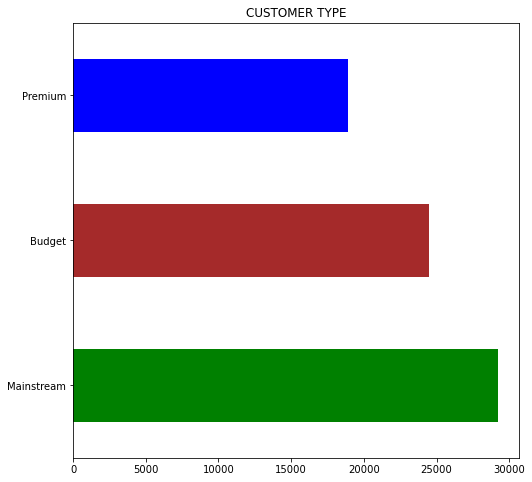

In [9]:
# plotting the count values of premium customer in barh graph
plt.figure(figsize=[8,8])
colors=['green','brown','blue']
dfp['PREMIUM_CUSTOMER'].value_counts().plot.barh(color=colors)
plt.title('CUSTOMER TYPE')


# Customer column has 3 types of cutomers and there counts are as follows
1. Premium-29245.
2. Budget-24470.
3. Mainstream-18922

Text(0.5, 1.0, 'Customer Type in Percentage')

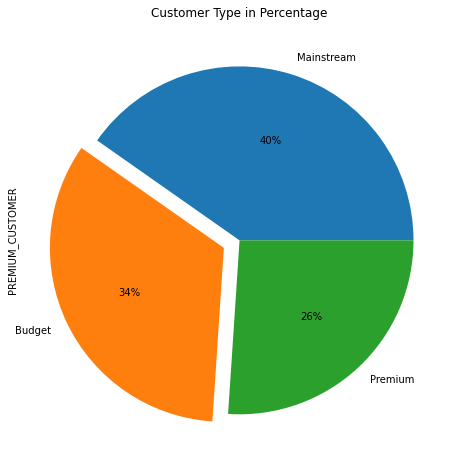

In [10]:
# pie plot of customer column visualization
plt.figure(figsize=[8,8])
explodes=[0,0.1,0]
dfp['PREMIUM_CUSTOMER'].value_counts().plot(kind='pie',autopct='%.0f%%',explode=explodes)
plt.title('Customer Type in Percentage')

In [11]:
# checking unique valuues of lifestage
dfp['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [12]:
# count of lifestage columns according Lifestages
dfp['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

Text(0.5, 1.0, 'LIFESTAGE COUNT')

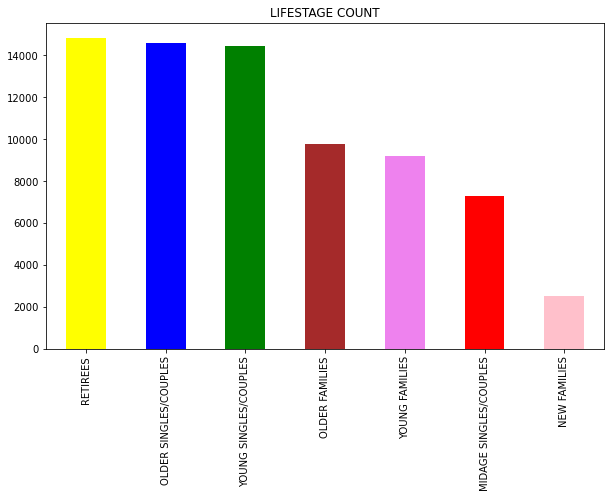

In [13]:
# plotting the count of lifestage in barh graph
plt.figure(figsize=[10,6])
colors=['yellow','blue','green','brown','violet','red','pink']
dfp['LIFESTAGE'].value_counts().plot(kind='bar',color=colors)
plt.title('LIFESTAGE COUNT')

# Top 3 most custometrs based on the lifestage are:
1. Retirees
2. Older single/Couples
3. Young single/Couples

Text(0.5, 1.0, 'lifestage in Percentage')

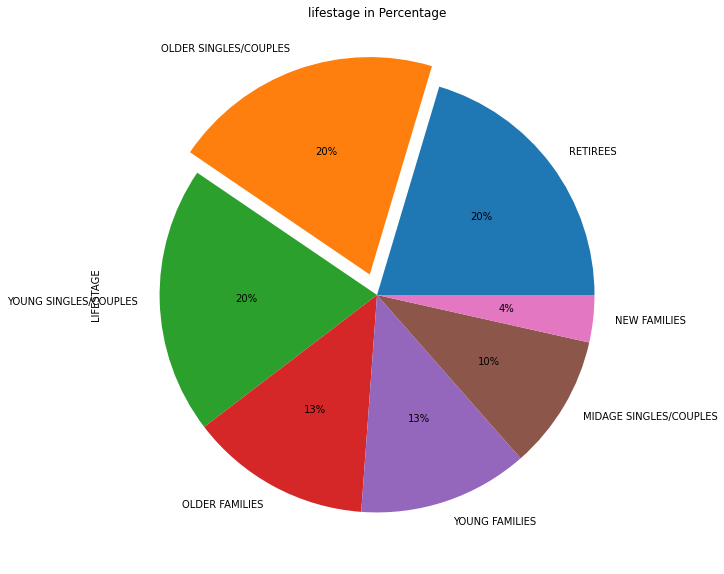

In [14]:
# Visualizing the Lifestage in Pie Plot
plt.figure(figsize=[10,10])
explodes=[0,0.1,0,0,0,0,0]
dfp['LIFESTAGE'].value_counts().plot(kind='pie',autopct='%.0f%%',explode=explodes)
plt.title('lifestage in Percentage')

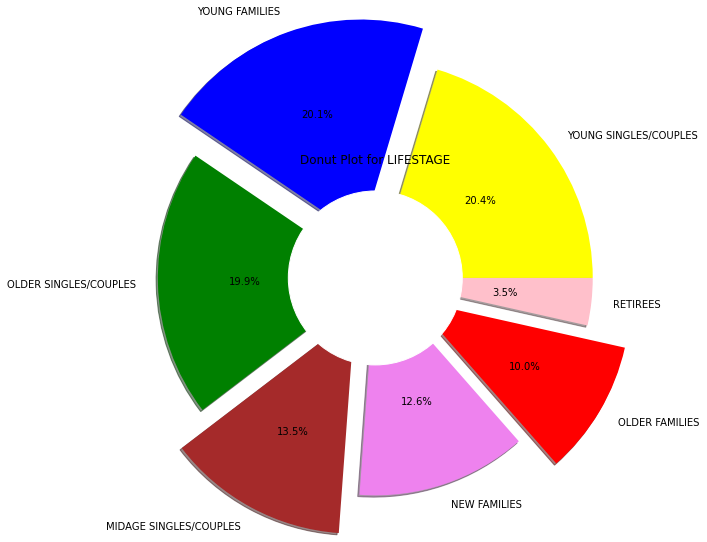

In [15]:
# Visualizing Lifestage in Donut Plot
data = dfp['LIFESTAGE'].value_counts()
explode = (0,0.5,0,0.5,0,0.5,0)
color=['yellow','blue','green','brown','violet','red','pink']
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.5, 
        labels = ['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'],colors=color)
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for LIFESTAGE')
plt.show()

In [16]:
grouped=dfp.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).value_counts()
grouped

PREMIUM_CUSTOMER  LIFESTAGE               LYLTY_CARD_NBR
Budget            MIDAGE SINGLES/COUPLES  1052              1
                                          1081              1
                                          138208            1
                                          141345            1
                                          141177            1
                                                           ..
Premium           YOUNG SINGLES/COUPLES   12033             1
                                          12134             1
                                          12224             1
                                          12288             1
                                          272380            1
Length: 72637, dtype: int64

In [17]:
# checking duplicate values
duplicate=dfp[dfp.duplicated()]
print("Duplicate Rows :",duplicate)

Duplicate Rows : Empty DataFrame
Columns: [LYLTY_CARD_NBR, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


# In Purchase Data Set there is no any duplicates are present

In [18]:
dfp.describe().T

,count,mean,std,min,25%,50%,75%,max
LYLTY_CARD_NBR,72637.0,136185.93177,89892.932014,1000.0,66202.0,134040.0,203375.0,2373711.0


In [19]:
# reading transaction data set of chips
dft=pd.read_excel(r"C:\Users\Dell\Desktop\saurabhpractice\Quantium project\QVI_transaction_data.xlsx")
dft

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [20]:
# checking shape of data set
dft.shape

(264836, 8)

In [21]:
# checking number of columns in data set
dft.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [22]:
# data types of data set
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


# All the columns are in int and float datatype except Product name its in categorical format.
# Date column is in the int data type needs to convert into date time format.

In [23]:
dft.describe().T

,count,mean,std,min,25%,50%,75%,max
DATE,264836.0,43464.036260,105.389282,43282.0,43373.0,43464.0,43555.00,43646.0
STORE_NBR,264836.0,135.080110,76.784180,1.0,70.0,130.0,203.00,272.0
LYLTY_CARD_NBR,264836.0,135549.476404,80579.978022,1000.0,70021.0,130357.5,203094.25,2373711.0
TXN_ID,264836.0,135158.310815,78133.026026,1.0,67601.5,135137.5,202701.25,2415841.0
PROD_NBR,264836.0,56.583157,32.826638,1.0,28.0,56.0,85.00,114.0
PROD_QTY,264836.0,1.907309,0.643654,1.0,2.0,2.0,2.00,200.0
TOT_SALES,264836.0,7.304200,3.083226,1.5,5.4,7.4,9.20,650.0


In [24]:
#checking missing values
dft.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

# No null values are present in the Transaction data set

In [25]:
#checking duplicate values
duplicate_=dft[dft.duplicated()]
#duplicate_

# One Duplicate Row is present in the Tansaction data set ie row 124845 

In [26]:
removing_duplicate=dft.drop_duplicates(keep=False,inplace=True)
removing_duplicate

### OBSERVATION

In [27]:
# Date Column is in the integer formate (Need correction)
# No null(missing) Values are found.
# Found One Duplicate Row (124845).

In [28]:
dft.head(1)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0


Text(0.5, 1.0, 'OUTLIERS')

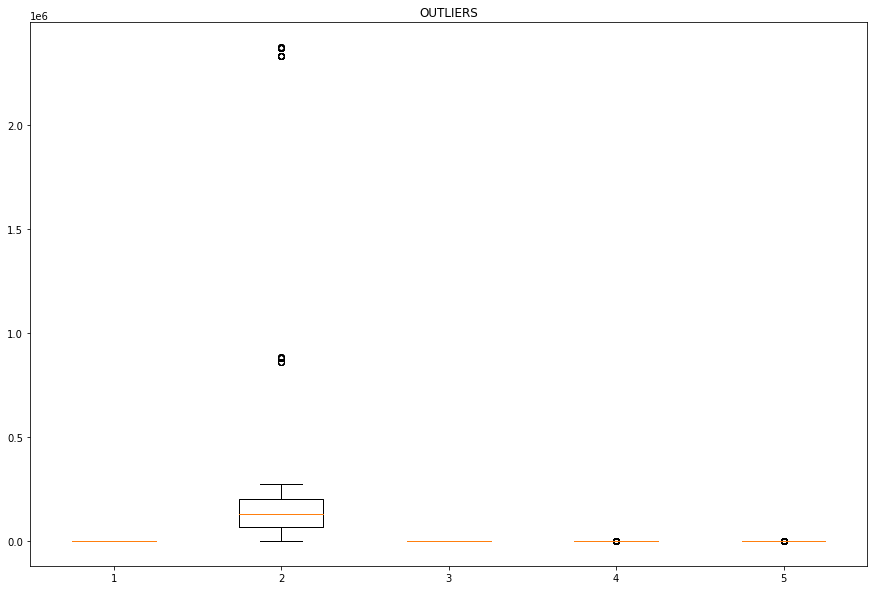

In [29]:
# checking outliers with boxplot
numeric_cols = ['STORE_NBR', 'LYLTY_CARD_NBR', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES']
plt.figure(figsize=[15,10])
plt.boxplot(dft[numeric_cols])
plt.title('OUTLIERS')

In [30]:
# LYLTY Card number has some outliers present by looking to boxplot

In [31]:
# checking outliers using IQR method
Q1 = dft['LYLTY_CARD_NBR'].quantile(0.25)
Q3 = dft['LYLTY_CARD_NBR'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# Identify outliers
outliers = dft[(dft['LYLTY_CARD_NBR'] < lower_bound) | (dft['LYLTY_CARD_NBR'] > upper_bound)]
print(outliers)

# Replace outliers with the median value
median = dft['LYLTY_CARD_NBR'].median()
dft['LYLTY_CARD_NBR'] = np.where((dft['LYLTY_CARD_NBR'] < lower_bound) | 
                                 (dft['LYLTY_CARD_NBR'] > upper_bound), median, dft['LYLTY_CARD_NBR'])



         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
1440    43298         77         2330211  236744        94   
15676   43315         88         2370651  240350         4   
19455   43350         77         2330031  236717        19   
19463   43288         77         2330031  236716       102   
32030   43302         77         2330461  236777        87   
39777   43357        237          880171   86305        32   
39778   43371        237          880171   86306        24   
39794   43347        237          880711   86566        31   
39795   43358        237          880711   86567         3   
53106   43397         88         2370961  240480        70   
53107   43400         88         2370961  240481        65   
80809   43411         77         2330191  236740        67   
96939   43636         77         2330501  236780        63   
97171   43399         88         2370361  240224        25   
97172   43451         88         2370581  240317        93   
97173   

Text(0.5, 1.0, 'OUTLIERS')

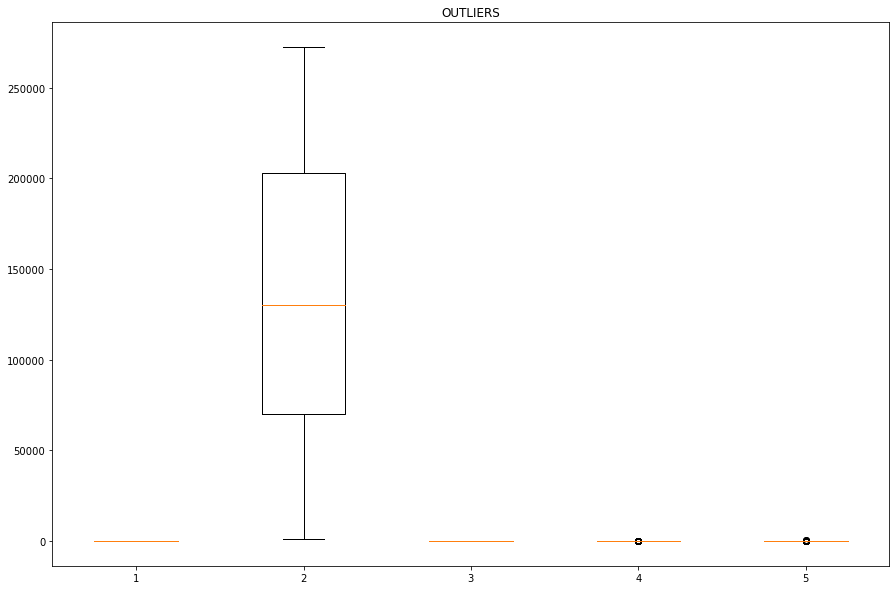

In [32]:
# viewing the outliers present after 
numeric_cols = ['STORE_NBR', 'LYLTY_CARD_NBR', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES']
plt.figure(figsize=[15,10])
plt.boxplot(dft[numeric_cols])
plt.title('OUTLIERS')

In [33]:
# checking number of outliers in LYLTY_CARD_NBR
outliers.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
1440,43298,77,2330211,236744,94,Burger Rings 220g,1,2.3
15676,43315,88,2370651,240350,4,Dorito Corn Chp Supreme 380g,2,13.0
19455,43350,77,2330031,236717,19,Smiths Crinkle Cut Snag&Sauce 150g,2,5.2
19463,43288,77,2330031,236716,102,Kettle Mozzarella Basil & Pesto 175g,1,5.4
32030,43302,77,2330461,236777,87,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8


Text(0.5, 1.0, 'OUTLIERS')

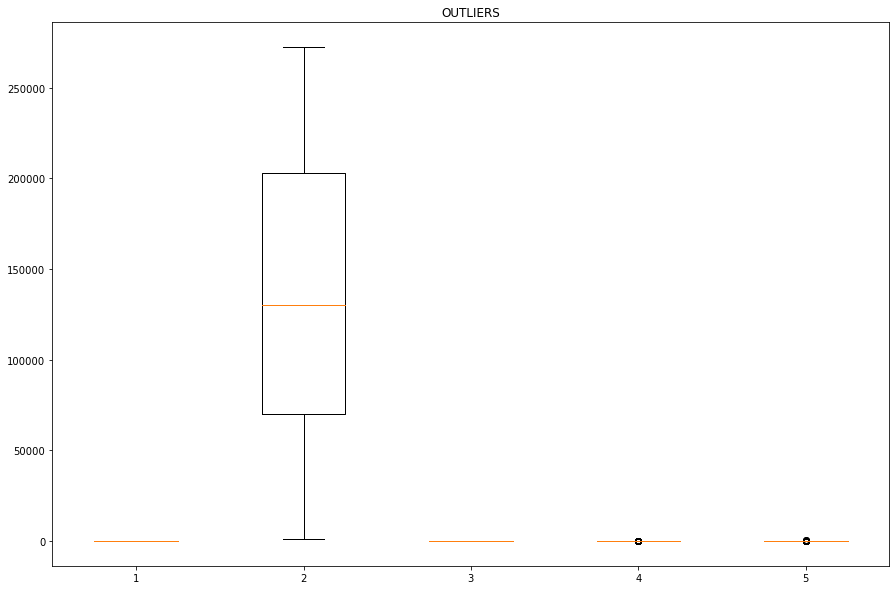

In [34]:
#plotting box plot to check outliers after imputation with median value.
numeric_cols = ['STORE_NBR', 'LYLTY_CARD_NBR', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES']
plt.figure(figsize=[15,10])
plt.boxplot(dft[numeric_cols])
plt.title('OUTLIERS')

In [35]:
# converting Date column into Date format
from datetime import datetime
dft['Date'] = pd.to_datetime(dft['DATE'], unit='D', origin='1899-12-30')

In [36]:
# checking data types of data set
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264834 non-null  int64         
 1   STORE_NBR       264834 non-null  int64         
 2   LYLTY_CARD_NBR  264834 non-null  float64       
 3   TXN_ID          264834 non-null  int64         
 4   PROD_NBR        264834 non-null  int64         
 5   PROD_NAME       264834 non-null  object        
 6   PROD_QTY        264834 non-null  int64         
 7   TOT_SALES       264834 non-null  float64       
 8   Date            264834 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 20.2+ MB


In [37]:
dft.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date
0,43390,1,1000.0,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,43599,1,1307.0,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,43605,1,1343.0,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,43329,2,2373.0,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,43330,2,2426.0,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18


In [38]:
dft['DATE']

0         43390
1         43599
2         43605
3         43329
4         43330
          ...  
264831    43533
264832    43325
264833    43410
264834    43461
264835    43365
Name: DATE, Length: 264834, dtype: int64

In [39]:
# creating New column product size from product name
dft['PRODUCT_SIZE']=dft['PROD_NAME'].copy()

In [40]:
# Extracting all the string values from the product size
dft['PRODUCT_SIZE'] = dft['PRODUCT_SIZE'].str.extract('(\d+)')[0]
dft['PRODUCT_SIZE'] = dft['PRODUCT_SIZE'].str.lower()

In [41]:
#Removing all the sepcial characters from the Product Name
dft['PROD_NAME']=dft['PROD_NAME'].str.replace('\d+g','')
dft['PROD_NAME']=dft['PROD_NAME'].str.replace('@,#,$,%,&,*,?,/,g','')

In [42]:
dft.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,PRODUCT_SIZE
0,43390,1,1000.0,1,5,Natural Chip Compny SeaSalt,2,6.0,2018-10-17,175
1,43599,1,1307.0,348,66,CCs Nacho Cheese,3,6.3,2019-05-14,175
2,43605,1,1343.0,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,2019-05-20,170
3,43329,2,2373.0,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,2018-08-17,175
4,43330,2,2426.0,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,2018-08-18,150


In [43]:
# Droping the DATE columns
dft=dft.drop('DATE',axis=1)
dft.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,PRODUCT_SIZE
0,1,1000.0,1,5,Natural Chip Compny SeaSalt,2,6.0,2018-10-17,175
1,1,1307.0,348,66,CCs Nacho Cheese,3,6.3,2019-05-14,175
2,1,1343.0,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,2019-05-20,170
3,2,2373.0,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,2018-08-17,175
4,2,2426.0,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,2018-08-18,150


In [44]:
dft.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,PRODUCT_SIZE
0,1,1000.0,1,5,Natural Chip Compny SeaSalt,2,6.0,2018-10-17,175
1,1,1307.0,348,66,CCs Nacho Cheese,3,6.3,2019-05-14,175
2,1,1343.0,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,2019-05-20,170
3,2,2373.0,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,2018-08-17,175
4,2,2426.0,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,2018-08-18,150


In [45]:
# checking number of uniques chips name in product name
dft['PROD_NAME'].nunique()

114

In [46]:
# 114 types of unique product are present
dft['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt', 'CCs Nacho Cheese    ',
       'Smiths Crinkle Cut  Chips Chicken ',
       'Smiths Chip Thinly  S/Cream&Onion ',
       'Kettle Tortilla ChpsHny&Jlpno Chili ',
       'Old El Paso Salsa   Dip Tomato Mild ',
       'Smiths Crinkle Chips Salt & Vinegar ',
       'Grain Waves         Sweet Chilli ',
       'Doritos Corn Chip Mexican Jalapeno ',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime ', 'Twisties Cheese     ',
       'WW Crinkle Cut      Chicken ', 'Thins Chips Light&  Tangy ',
       'CCs Original ', 'Burger Rings ',
       'NCC Sour Cream &    Garden Chives ',
       'Doritos Corn Chip Southern Chicken ', 'Cheezels Cheese Box ',
       'Smiths Crinkle      Original ',
       'Infzns Crn Crnchers Tangy Gcamole ',
       'Kettle Sea Salt     And Vinegar ',
       'Smiths Chip Thinly  Cut Original ', 'Kettle Original ',
       'Red Rock Deli Thai  Chilli&Lime ', 'Pringles Sthrn FriedChicken ',
  

In [47]:
# counting number of unique product present in the column
dft['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto       3304
Kettle Tortilla ChpsHny&Jlpno Chili     3296
Cobs Popd Swt/Chlli &Sr/Cream Chips     3269
Tyrrells Crisps     Ched & Chives       3268
Cobs Popd Sea Salt  Chips               3265
                                        ... 
RRD Pc Sea Salt                         1431
Woolworths Medium   Salsa               1430
NCC Sour Cream &    Garden Chives       1419
French Fries Potato Chips               1418
WW Crinkle Cut      Original            1410
Name: PROD_NAME, Length: 114, dtype: int64

In [48]:
#dft['PROD_NAME'].value_counts().sort_values()

In [49]:
# Merging Purchase daten set with the Transaction data set.
data=pd.merge(dfp,dft, on='LYLTY_CARD_NBR')
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,PRODUCT_SIZE
0,1000,YOUNG SINGLES/COUPLES,Premium,1,1,5,Natural Chip Compny SeaSalt,2,6.0,2018-10-17,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1,2,58,Red Rock Deli Chikn&Garlic Aioli,1,2.7,2018-09-16,150
2,1003,YOUNG FAMILIES,Budget,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2019-03-07,210
3,1003,YOUNG FAMILIES,Budget,1,4,106,Natural ChipCo Hony Soy Chckn,1,3.0,2019-03-08,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,1,5,96,WW Original Stacked Chips,1,1.9,2018-11-02,160


In [50]:
# unique values in Product number
data['PROD_NBR'].unique()

array([  5,  58,  52, 106,  96,  86,  49,  10,  20,  51,  59,  84,   1,
         3,  93,  91,  74,  63,  97,  38,  19,   7,  53,  69,  16,  64,
        75,  80,  12,  94, 105,  37,  40,  45, 112,  30, 111,   8,  44,
        47, 114,  73,  43,  23,  36,  70,  15,  92,  67,  87,  95, 101,
        60, 107,  83,  79,  17,  57,  90,   6,  66,  55,   9,  99,  68,
        29, 102,  54,  50,  14,  61, 100, 113,  76,  48,  11,  27, 110,
        35,  56,  41,  33,  31,  21,  62, 109,  24,  26,  46, 104,  65,
        39,  18,  89,  77,   2,  13,  71,  32,  72,   4,  42,  25, 108,
       103,  78,  22,  85,  88,  98,  81,  82,  28,  34], dtype=int64)

In [51]:
# unique values in total sale column
data['TOT_SALES'].unique()

array([  6.  ,   2.7 ,   3.6 ,   3.  ,   1.9 ,   2.8 ,   3.8 ,   5.7 ,
         8.8 ,   5.1 ,   6.2 ,   2.9 ,   4.6 ,   3.9 ,   4.2 ,   4.4 ,
         2.4 ,   3.1 ,   2.6 ,   2.1 ,   5.4 ,   2.3 ,   1.8 ,   3.3 ,
         4.8 ,   5.8 ,   8.4 ,   1.7 ,   3.4 ,   7.4 ,   3.7 ,  10.8 ,
         5.9 ,  11.8 ,   1.5 ,  10.2 ,   7.6 ,   6.6 ,   4.3 ,  11.4 ,
         6.5 ,   7.8 ,   9.2 ,   5.2 ,   6.3 ,   7.2 ,   8.6 ,  10.4 ,
        15.  ,  13.8 ,  13.  ,   3.25,  11.1 ,  17.7 ,   5.6 ,  22.  ,
        18.4 ,  15.3 ,   9.9 ,  13.5 ,  13.2 ,  15.2 ,  17.6 ,  23.  ,
        19.5 ,  12.  ,  11.6 ,  16.5 ,  18.5 ,  11.7 ,  22.8 ,   8.5 ,
        14.8 ,  15.5 ,   9.  ,  12.6 ,  16.25,   9.6 ,  21.5 ,  17.1 ,
        20.4 ,  14.5 ,  29.5 ,  10.5 ,  15.6 ,  19.  ,   6.8 ,  21.6 ,
        16.2 ,   8.7 ,  27.  ,  25.5 ,   4.5 ,   9.5 ,  18.  ,   9.3 ,
        23.6 ,  16.8 ,   9.75,  21.  ,  14.  ,   6.9 ,  14.4 ,   8.1 ,
        11.5 ,  28.5 ,  12.4 ,  17.2 ,   7.5 ,  11.2 ,  12.9 , 650.  ])

In [52]:
data.shape

(264834, 11)

In [53]:
#sales with respect to package size
package_sales=data.groupby("PRODUCT_SIZE")["TOT_SALES"].sum().sort_values(ascending=False)   
package_sales

PRODUCT_SIZE
175    485425.4
150    304288.5
134    177655.5
110    162765.4
170    146673.0
330    136794.3
300    113330.6
165    101360.6
380     76719.6
270     55425.4
210     43048.8
250     26096.7
135     26090.4
200     16007.5
190     14412.9
160     10647.6
90       9676.4
180      8568.4
70       6852.0
220      6831.0
125      5733.0
Name: TOT_SALES, dtype: float64

<Figure size 432x288 with 0 Axes>

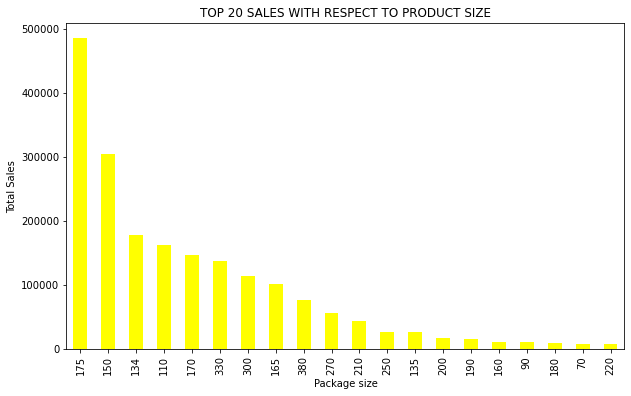

In [54]:
# Visualizing sales with respect to size of packets
plt.figure()
fig, ax = plt.subplots(figsize=(10,6))
package_sales.head(20).plot(kind='bar', ax=ax,color='yellow')
plt.title('TOP 20 SALES WITH RESPECT TO PRODUCT SIZE')
plt.xlabel('Package size')
plt.ylabel('Total Sales')
plt.show()

# By Visualizing grap Packet of size 175 is highest sale following 150 after it

In [55]:
# Checking Top 20 Sales by Product name with the groupby method
sales_by_Productname=data.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False)
sales_by_Productname.head(20)

PROD_NAME
Dorito Corn Chp     Supreme             40352.0
Smiths Crnkle Chip  Orgnl Big Bag       36367.6
Smiths Crinkle Chips Salt & Vinegar     34804.2
Kettle Mozzarella   Basil & Pesto       34457.4
Smiths Crinkle      Original            34302.6
Cheezels Cheese                         34296.9
Doritos Cheese      Supreme             33390.6
Kettle Sweet Chilli And Sour Cream      33031.8
Kettle Original                         32740.2
Kettle Sea Salt     And Vinegar         32589.0
Kettle Honey Soy    Chicken             32578.2
Kettle Chilli                           31271.4
Old El Paso Salsa   Dip Chnky Tom Ht    30513.3
Old El Paso Salsa   Dip Tomato Med      30237.9
Old El Paso Salsa   Dip Tomato Mild     30033.9
Kettle Tortilla ChpsHny&Jlpno Chili     29021.4
Kettle Sensations   Camembert & Fig     28308.4
Twisties Chicken                        27853.0
Kettle Tortilla ChpsBtroot&Ricotta      27770.2
Kettle Tortilla ChpsFeta&Garlic         27627.6
Name: TOT_SALES, dtype: float6

In [56]:
# using group by method to find out sale by customer
sales_by_customer = data.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES',ascending=False).reset_index(drop=True)
sales_by_customer.head(20)

,PROD_NAME,TOT_SALES
0,Dorito Corn Chp Supreme,40352.0
1,Smiths Crnkle Chip Orgnl Big Bag,36367.6
2,Smiths Crinkle Chips Salt & Vinegar,34804.2
3,Kettle Mozzarella Basil & Pesto,34457.4
4,Smiths Crinkle Original,34302.6
5,Cheezels Cheese,34296.9
6,Doritos Cheese Supreme,33390.6
7,Kettle Sweet Chilli And Sour Cream,33031.8
8,Kettle Original,32740.2
9,Kettle Sea Salt And Vinegar,32589.0


<Figure size 432x288 with 0 Axes>

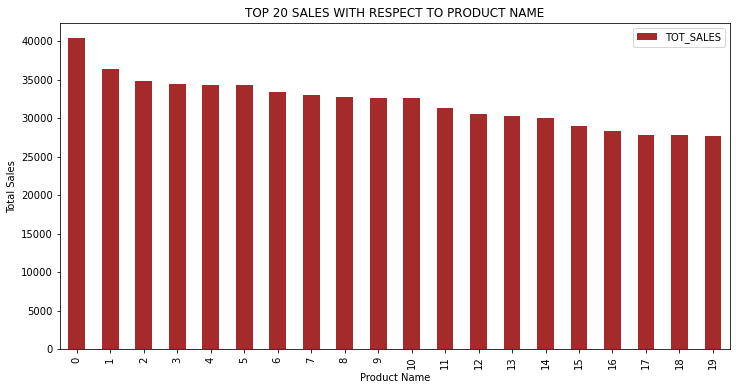

In [57]:
# Visualizing the Top 20 sales by Product name
plt.figure()
fig, ax = plt.subplots(figsize=(12,6))
sales_by_customer.head(20).plot(kind='bar', ax=ax,color='brown')
plt.title('TOP 20 SALES WITH RESPECT TO PRODUCT NAME')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.show()

In [84]:
# using group by method to find out sale by customer
Lowest_sales_by_customer = data.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES',ascending=True).reset_index(drop=True)
Lowest_sales_by_customer.head(20)

,PROD_NAME,TOT_SALES
0,Woolworths Medium Salsa,4050.0
1,Woolworths Mild Salsa,4234.5
2,WW Crinkle Cut Original,4532.2
3,Sunbites Whlegrn Crisps Frch/Onin,4600.2
4,WW Crinkle Cut Chicken,4702.2
5,Snbts Whlgrn Crisps Cheddr&Mstrd,5076.2
6,Woolworths Cheese Rings,5169.6
7,WW D/Style Chip Sea Salt,5249.7
8,WW Sour Cream &OnionStacked Chips,5323.8
9,WW Original Stacked Chips,5323.8


<Figure size 432x288 with 0 Axes>

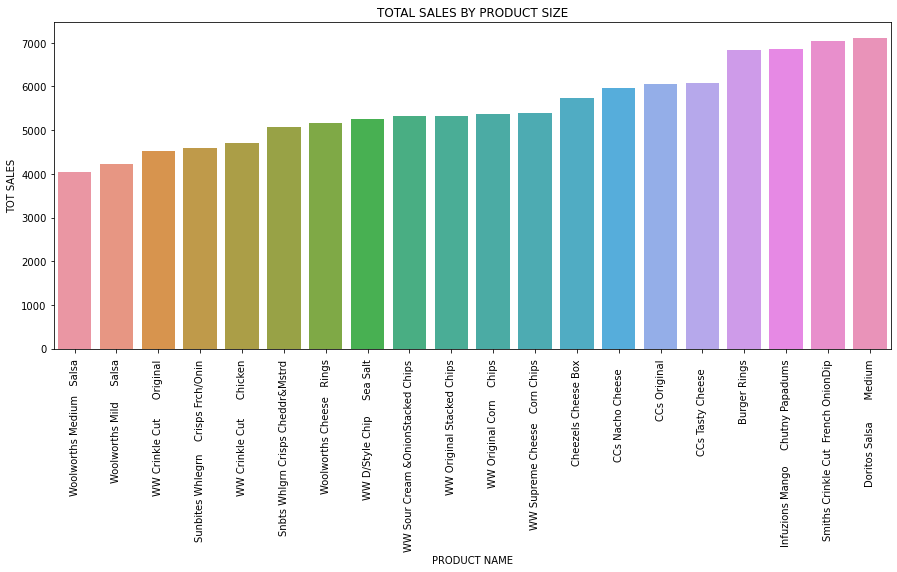

In [88]:
# Visualizing the Top Lowest 20 sales by Product name
plt.figure()
plt.figure(figsize=[15,6])
sns.barplot(x='PROD_NAME',y='TOT_SALES', data=Lowest_sales_by_customer.head(20))
plt.title('TOTAL SALES BY PRODUCT SIZE')
plt.xlabel('PRODUCT NAME')
plt.ylabel('TOT SALES')
plt.xticks(rotation=90)
plt.show()

# Dorrito corn has the highest sale following smith chunks chips

In [58]:
#checking total number of years
data['YEAR']=data['Date'].dt.year
data['YEAR']

0         2018
1         2018
2         2019
3         2019
4         2018
          ... 
264829    2018
264830    2018
264831    2018
264832    2018
264833    2019
Name: YEAR, Length: 264834, dtype: int64

In [59]:
# Sales by year using groupby
Sales_by_year=data.groupby(data['YEAR'])['TOT_SALES'].sum().sort_values()
Sales_by_year

YEAR
2019    957323.85
2018    977079.15
Name: TOT_SALES, dtype: float64

# Total Sales by the year

Text(0.5, 1.0, 'TOTAL SALES BY YEAR')

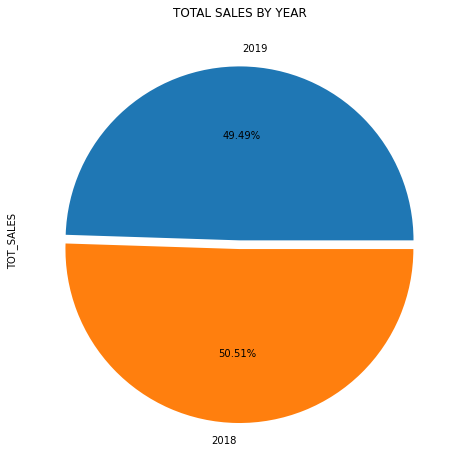

In [60]:
# plotting pie plot sales by year
plt.figure(figsize=[8,8])
Sales_by_year.plot(kind='pie',autopct='%1.2f%%',explode=(0,0.05))
plt.title('TOTAL SALES BY YEAR')

# Almost has equal sale in both the year i.e 2018 and 2019

In [61]:
# checking relation with packet size with respect to customer
packagesize_by_customer=data.groupby(['PREMIUM_CUSTOMER', 'PRODUCT_SIZE']).size().reset_index(name='count')
packagesize_by_customer = packagesize_by_customer.sort_values(by='count', ascending=False)
packagesize_by_customer

,PREMIUM_CUSTOMER,PRODUCT_SIZE,count
29,Mainstream,175,25150
8,Budget,175,23589
50,Premium,175,17649
25,Mainstream,150,16573
4,Budget,150,15226
...,...,...,...
22,Mainstream,125,505
55,Premium,220,437
61,Premium,70,428
43,Premium,125,407


In [79]:
# checking relation with lowest packet size count with respect to customer
packagesize_by_customer=data.groupby(['PREMIUM_CUSTOMER', 'PRODUCT_SIZE']).size().reset_index(name='count')
packagesize_by_customer = packagesize_by_customer.sort_values(by='count', ascending=True)
packagesize_by_customer.head(10)

,PREMIUM_CUSTOMER,PRODUCT_SIZE,count
51,Premium,180,405
43,Premium,125,407
61,Premium,70,428
55,Premium,220,437
22,Mainstream,125,505
30,Mainstream,180,521
40,Mainstream,70,523
1,Budget,125,542
9,Budget,180,542
34,Mainstream,220,549


In [62]:
# checking Total sale with respect to customers lifestage
sales_by_lifestage=data.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False)
sales_by_lifestage

LIFESTAGE
OLDER SINGLES/COUPLES     402310.55
RETIREES                  366422.30
OLDER FAMILIES            353710.00
YOUNG FAMILIES            316110.50
YOUNG SINGLES/COUPLES     260362.90
MIDAGE SINGLES/COUPLES    185053.30
NEW FAMILIES               50433.45
Name: TOT_SALES, dtype: float64

Text(0, 0.5, 'Total Sales')

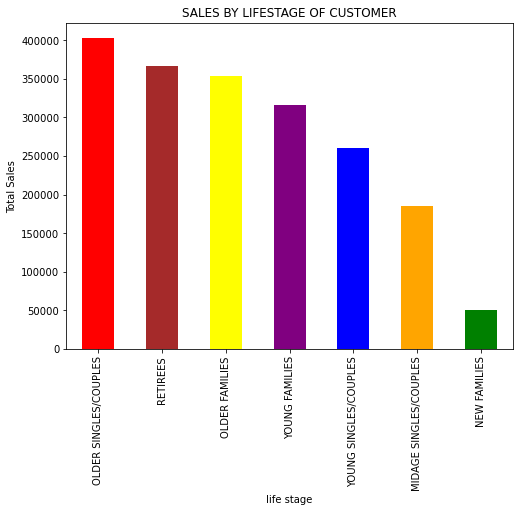

In [63]:
# Visualizing the Sales with respect to customers lifestage
plt.figure(figsize=[8,6])
colors=['red','brown','yellow','purple','blue','orange','green']
sales_by_lifestage.plot(kind='bar',color=colors)
plt.title('SALES BY LIFESTAGE OF CUSTOMER')
plt.xlabel('life stage')
plt.ylabel('Total Sales')

#

In [64]:
# checking count of customers lifestage with respect to Packet size
lifestage_product_size=data.groupby('LIFESTAGE')['PRODUCT_SIZE'].size().reset_index(name='count')
lifestage_product_size=lifestage_product_size.sort_values(by='count', ascending=False).reset_index(drop=True)
lifestage_product_size

,LIFESTAGE,count
0,OLDER SINGLES/COUPLES,54462
1,RETIREES,49756
2,OLDER FAMILIES,48589
3,YOUNG FAMILIES,43586
4,YOUNG SINGLES/COUPLES,36372
5,MIDAGE SINGLES/COUPLES,25150
6,NEW FAMILIES,6919


Text(0, 0.5, 'Product Size')

<Figure size 720x432 with 0 Axes>

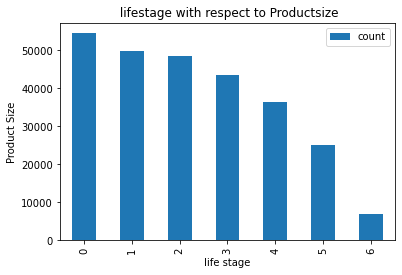

In [90]:
# plotting the count of customers lifestage with respect to Packet size
plt.figure(figsize=[10,6])
lifestage_product_size.plot(kind='bar')
plt.title(' lifestage with respect to Productsize')
plt.xlabel('life stage')
plt.ylabel('Product Size')

In [66]:
# checking the sales by the Product size
productsize_total_sales=data.groupby('PRODUCT_SIZE')['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES',ascending=False)
productsize_total_sales=productsize_total_sales.reset_index(drop=True)
productsize_total_sales

,PRODUCT_SIZE,TOT_SALES
0,175,485425.4
1,150,304288.5
2,134,177655.5
3,110,162765.4
4,170,146673.0
5,330,136794.3
6,300,113330.6
7,165,101360.6
8,380,76719.6
9,270,55425.4


Text(0, 0.5, 'TOT SALES')

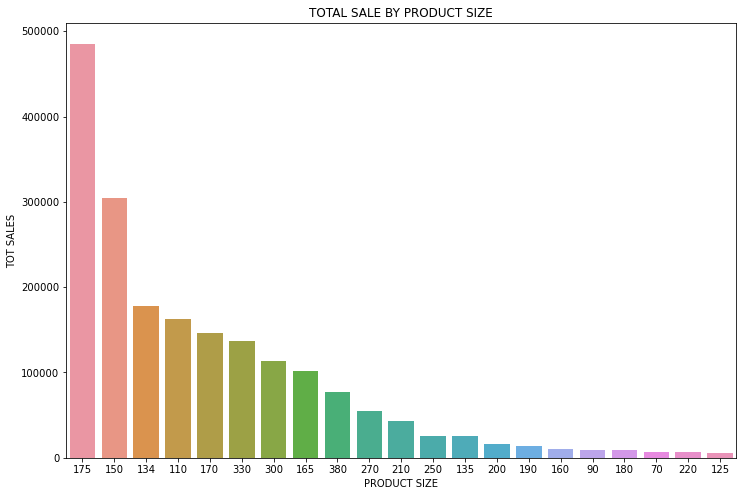

In [67]:
# Visualizing the Sales by Product Size
plt.figure(figsize=[12,8])
sns.barplot(x='PRODUCT_SIZE',y='TOT_SALES', data=productsize_total_sales)
plt.title('TOTAL SALE BY PRODUCT SIZE')
plt.xlabel('PRODUCT SIZE')
plt.ylabel('TOT SALES')

In [68]:
data.head(2)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,PRODUCT_SIZE,YEAR
0,1000,YOUNG SINGLES/COUPLES,Premium,1,1,5,Natural Chip Compny SeaSalt,2,6.0,2018-10-17,175,2018
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1,2,58,Red Rock Deli Chikn&Garlic Aioli,1,2.7,2018-09-16,150,2018


In [69]:
data['Month']=data['Date'].dt.month
data['Month'].head()

0    10
1     9
2     3
3     3
4    11
Name: Month, dtype: int64

In [71]:
import calendar
def convert_month(month):
    if isinstance(month, int):
        return calendar.month_name[month]
    else:
        return pd.to_datetime(month, format='%B').strftime('%B')

data['Month'] = pd.Categorical(data['Month'].apply(convert_month), categories=calendar.month_name[1:], ordered=True)

In [72]:
#checkimh the Sales with respect to Month
sales_by_month=data.groupby('Month')['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES', ascending=False)
sales_by_month=sales_by_month.reset_index(drop=True)
sales_by_month

,Month,TOT_SALES
0,December,167913.40
1,March,166265.20
2,July,165275.30
3,October,164403.70
4,January,162642.30
5,June,160538.60
6,September,160522.00
7,November,160233.70
8,April,159845.10
9,August,158731.05


Text(0, 0.5, 'Total Sales')

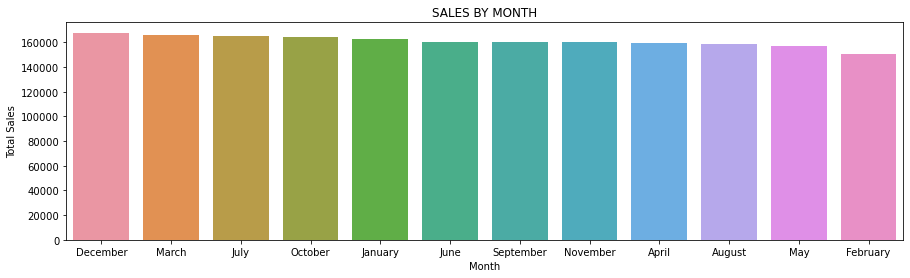

In [73]:
# visualizing the sales by month
plt.figure(figsize=[15,4])
order = sales_by_month.sort_values('TOT_SALES', ascending=False)['Month'].values
sns.barplot( x='Month', y='TOT_SALES', data=sales_by_month,  order=order)
plt.title('SALES BY MONTH')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# CONCLUSION
